In [36]:
import random

from dataloaders.classication_dataset import get_data_loaders as get_classif_data_loaders
from dataloaders.segmentation_dataset import get_data_loaders as get_seg_data_loaders

from architectures.classifiers import SimpleCNN, VGG16Binary, ResNet18Binary, SqueezeNetBinary
from architectures.segmenters import Unet

from training_algorithms.classification_training import train_classification_model as train_classif_model
from training_algorithms.segmentation_training import train_segmentation_model as train_seg_model

import utils.utils as utils
from utils.gradcamplpl import gradcamplpl_mask

import torch
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image
from torchmetrics.classification import Dice
import random

if not torch.cuda.is_available():
    raise RuntimeError("GPU is not available, good luck.")
for i in range(torch.cuda.device_count()):
   print(f"'cuda:{i}' is: {torch.cuda.get_device_properties(i).name}")
cuda_device = "cuda:1"

# Seed to ensure train val test are split the same way for classification and segmentation dataloaders
split_seed = 777
dataset = "PANNUKE0"

'cuda:0' is: Quadro RTX 6000
'cuda:1' is: Quadro RTX 6000
'cuda:2' is: Quadro RTX 6000


In [20]:
classif_model = ResNet18Binary()
classif_train_loader, classif_val_loader, classif_test_loader = get_classif_data_loaders(
    img_dir=f"data/{dataset}/images",
    label_file=f"data/{dataset}/labels/labels.npy",
    contiguous_ids_file=f"data/{dataset}/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

Training for epoch 0: 100%|██████████| 90/90 [00:09<00:00,  9.75it/s]


Epoch 1/1000
Train loss: 0.7062460581461588
Val loss: 0.693011098437839


Training for epoch 1: 100%|██████████| 90/90 [00:09<00:00,  9.12it/s]


Epoch 2/1000
Train loss: 0.6940905114014944
Val loss: 0.6931472990247939
No progress on best val loss (0.693011098437839) was made, patience reduced to 2.


Training for epoch 2: 100%|██████████| 90/90 [00:09<00:00,  9.82it/s]


Epoch 3/1000
Train loss: 0.6931024273236592
Val loss: 0.6931472990247939
No progress on best val loss (0.693011098437839) was made, patience reduced to 1.


Training for epoch 3: 100%|██████████| 90/90 [00:10<00:00,  8.98it/s]


Epoch 4/1000
Train loss: 0.6929178747865888
Val loss: 0.6931472990247939
No progress on best val loss (0.693011098437839) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 0.0001.


Training for epoch 4: 100%|██████████| 90/90 [00:09<00:00,  9.69it/s]


Epoch 5/1000
Train loss: 0.6930450710985395
Val loss: 0.6931472990247939
No progress on best val loss (0.693011098437839) was made, patience reduced to 2.


Training for epoch 5: 100%|██████████| 90/90 [00:09<00:00,  9.39it/s]


Epoch 6/1000
Train loss: 0.6865819931030274
Val loss: 0.6915178431404961
Progress on best val loss (0.693011098437839) was inferior to 0.005, patience reduced to 1.


Training for epoch 6: 100%|██████████| 90/90 [00:09<00:00,  9.73it/s]


Epoch 7/1000
Train loss: 0.6563993069860671
Val loss: 0.6575026830037435


Training for epoch 7: 100%|██████████| 90/90 [00:09<00:00,  9.27it/s]


Epoch 8/1000
Train loss: 0.6377636432647705
Val loss: 0.6420455111397637


Training for epoch 8: 100%|██████████| 90/90 [00:09<00:00,  9.27it/s]


Epoch 9/1000
Train loss: 0.5764737019936244
Val loss: 0.5735384689437019


Training for epoch 9: 100%|██████████| 90/90 [00:09<00:00,  9.94it/s]


Epoch 10/1000
Train loss: 0.5118428909116322
Val loss: 0.5364022867547141


Training for epoch 10: 100%|██████████| 90/90 [00:08<00:00, 10.33it/s]


Epoch 11/1000
Train loss: 0.5071875946389304
Val loss: 0.5052586654822032


Training for epoch 11: 100%|██████████| 90/90 [00:09<00:00,  9.48it/s]


Epoch 12/1000
Train loss: 0.4783096813493305
Val loss: 0.487038975291782


Training for epoch 12: 100%|██████████| 90/90 [00:09<00:00,  9.62it/s]


Epoch 13/1000
Train loss: 0.48842869963910845
Val loss: 0.5769364794095357
No progress on best val loss (0.487038975291782) was made, patience reduced to 2.


Training for epoch 13: 100%|██████████| 90/90 [00:09<00:00,  9.92it/s]


Epoch 14/1000
Train loss: 0.4567039935125245
Val loss: 0.48950443002912736
No progress on best val loss (0.487038975291782) was made, patience reduced to 1.


Training for epoch 14: 100%|██████████| 90/90 [00:08<00:00, 10.11it/s]


Epoch 15/1000
Train loss: 0.46102072017060386
Val loss: 0.4865869614813063
Progress on best val loss (0.487038975291782) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1e-05.


Training for epoch 15: 100%|██████████| 90/90 [00:09<00:00,  9.51it/s]


Epoch 16/1000
Train loss: 0.4314508343736331
Val loss: 0.47632761200269064


Training for epoch 16: 100%|██████████| 90/90 [00:08<00:00, 10.14it/s]


Epoch 17/1000
Train loss: 0.4268516418006685
Val loss: 0.47772835393746693
No progress on best val loss (0.47632761200269064) was made, patience reduced to 2.


Training for epoch 17: 100%|██████████| 90/90 [00:09<00:00,  9.76it/s]


Epoch 18/1000
Train loss: 0.42514659414688744
Val loss: 0.47291647924317254
Progress on best val loss (0.47632761200269064) was inferior to 0.005, patience reduced to 1.


Training for epoch 18: 100%|██████████| 90/90 [00:09<00:00, 10.00it/s]


Epoch 19/1000
Train loss: 0.4331503997246424
Val loss: 0.4676256067223019


Training for epoch 19: 100%|██████████| 90/90 [00:09<00:00,  9.34it/s]


Epoch 20/1000
Train loss: 0.42268200831280817
Val loss: 0.4673038108481301
Progress on best val loss (0.4676256067223019) was inferior to 0.005, patience reduced to 2.


Training for epoch 20: 100%|██████████| 90/90 [00:09<00:00,  9.94it/s]


Epoch 21/1000
Train loss: 0.4212244985832108
Val loss: 0.4626968542734782
Progress on best val loss (0.4673038108481301) was inferior to 0.005, patience reduced to 1.


Training for epoch 21: 100%|██████████| 90/90 [00:09<00:00,  9.77it/s]


Epoch 22/1000
Train loss: 0.41731170150968766
Val loss: 0.4772790365748935
No progress on best val loss (0.4626968542734782) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1.0000000000000002e-06.


Training for epoch 22: 100%|██████████| 90/90 [00:09<00:00,  9.74it/s]


Epoch 23/1000
Train loss: 0.41972708668973713
Val loss: 0.4651793546146817
No progress on best val loss (0.4626968542734782) was made, patience reduced to 2.


Training for epoch 23: 100%|██████████| 90/90 [00:09<00:00,  9.48it/s]


Epoch 24/1000
Train loss: 0.414960867828793
Val loss: 0.46404336425993176
No progress on best val loss (0.4626968542734782) was made, patience reduced to 1.


Training for epoch 24: 100%|██████████| 90/90 [00:08<00:00, 10.15it/s]


Epoch 25/1000
Train loss: 0.4200121995475557
Val loss: 0.477683201763365
No progress on best val loss (0.4626968542734782) was made, patience reduced to 0.
Best val loss: 0.4626968542734782 at epoch 20
Stopping training.


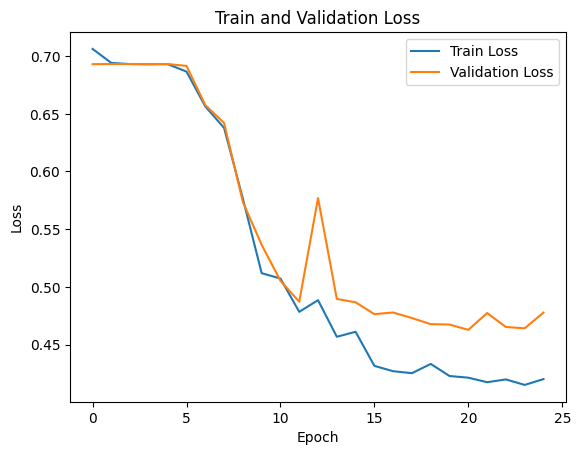

In [10]:
train_classif_model(classif_model, classif_train_loader, classif_val_loader, cuda_device, model_save_path=f"models/{dataset}/SqueezeNetBinary", learning_rate=0.001)

In [37]:

trained_model_path = f"models/{dataset}/resnet_24"
classif_model = ResNet18Binary()
classif_model.load_state_dict(torch.load(trained_model_path, map_location=torch.device(cuda_device), weights_only=False))
classif_model.eval()
classif_model.to(torch.device(cuda_device))

ResNet18Binary(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

Accuracy on test set: 88.50%


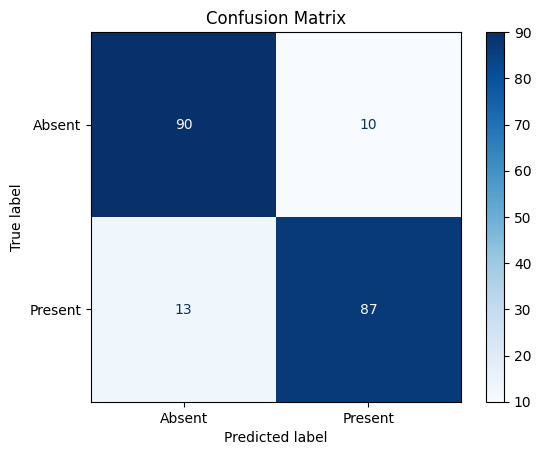

In [38]:
classif_model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
device = torch.device(cuda_device)
all_predictions = []
all_labels = []
all_inputs_tensors = []

    
# Disabling gradient calculation for evaluation
with torch.no_grad():
    for inputs, labels, _ in classif_test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = classif_model(inputs)

        # Get predicted class (the one with the highest score)
        _, predicted = torch.max(outputs, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_labels.append(labels.cpu().numpy())
        all_predictions.append(predicted.cpu().numpy())
        all_inputs_tensors.append(inputs.cpu().numpy())

# Flatten the lists to arrays
all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)
all_inputs_tensors = np.concatenate(all_inputs_tensors)

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')

cm = confusion_matrix(all_labels, all_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Absent', 'Present'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [3]:
# Get the ids of all the images
img_names = os.listdir(f"data/{dataset}/images")
all_ids = set()
for name in img_names:
    # The images should be named like 1.npy
    digit = name.split('.')[0]
    # Check the name of the file is a digit because sometimes config files are hidden in folders (if not don't use)
    if digit.isdigit():
        all_ids.add(int(digit))

In [7]:
# target_layer = classif_model.conv6 # for simple CNN
target_layer = classif_model.resnet.layer4 # for resnet
# target_layer = classif_model.features[-1] # for vgg
grad_maps = []

for _id in tqdm(all_ids):
    img_path = f"data/{dataset}/images/{_id}.png"
    path_map = f"CAM_outputs/{dataset}/grayscale_maps/{_id}.npy"
    grayscale_map = gradcamplpl_mask(classif_model, target_layer, img_path, cuda_device)
    np.save(path_map, grayscale_map)
    


100%|██████████| 2000/2000 [47:06<00:00,  1.41s/it] 


In [10]:
# Forgot to add a dimension to grayscale maps
for _id in tqdm(all_ids):
    path_map = f"CAM_outputs/{dataset}/grayscale_maps/{_id}.npy"
    grayscale_map = np.expand_dims(np.load(path_map), axis=-1)
    np.save(path_map, grayscale_map)

100%|██████████| 2000/2000 [00:01<00:00, 1525.71it/s]


In [7]:
# Now, we can generate centroids from the heatmap. The assumption is that those centroids are on the target cells.
for _id in all_ids:
    grayscale_map = np.load(f"CAM_outputs/{dataset}/grayscale_maps/{_id}.npy")
    #centroid_map = np.expand_dims(utils.get_centroids(grayscale_map), axis=-1)
    centroid_map = utils.get_centroids(grayscale_map)
    arr_min = np.min(centroid_map)
    arr_max = np.max(centroid_map)
    normalized_centroid_map = (centroid_map - arr_min) / (arr_max - arr_min)
    path_centroid_map = f"CAM_outputs/{dataset}/centroid_maps/{_id}.npy"
    np.save(path_centroid_map, normalized_centroid_map)

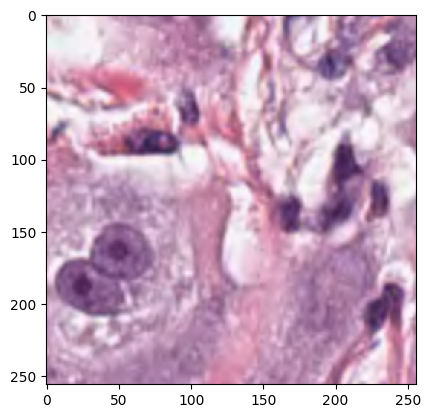

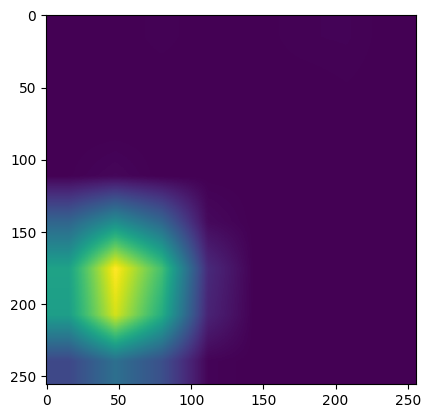

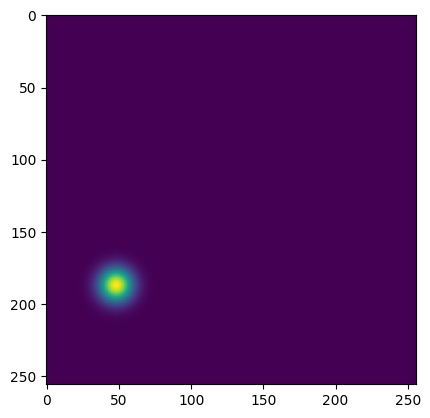

In [11]:
plt.imshow(Image.open(f"data/{dataset}/images/{0}.png").convert('RGB'))
plt.show()
plt.imshow(np.load(f"CAM_outputs/{dataset}/grayscale_maps/{0}.npy"))
plt.show()
plt.imshow(np.load(f"CAM_outputs/{dataset}/centroid_maps/{0}.npy"))
plt.show()

In [9]:
gradient_maps_model = Unet()
dataset = "PANNUKE0"
gradient_maps_train_loader, gradient_maps_val_loader, gradient_maps_test_loader = get_seg_data_loaders(
    img_dir=f"data/{dataset}/images",
    mask_dir=f"CAM_outputs/{dataset}/grayscale_maps",
    contiguous_ids_file=f"data/{dataset}/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=8,
    val_split=0.2,
    test_split=0.1
)

Training for epoch 0: 100%|██████████| 180/180 [00:39<00:00,  4.58it/s]


Epoch 1/1000
Train loss: 0.5314875115950902
Val loss: 0.5467292414771185


Training for epoch 1: 100%|██████████| 180/180 [00:40<00:00,  4.46it/s]


Epoch 2/1000
Train loss: 0.5163802675075001
Val loss: 0.5319637298583985


Training for epoch 2: 100%|██████████| 180/180 [00:40<00:00,  4.43it/s]


Epoch 3/1000
Train loss: 0.5159186489052243
Val loss: 0.5360692712995742
No progress on best val loss (0.5319637298583985) was made, patience reduced to 4.


Training for epoch 3: 100%|██████████| 180/180 [00:40<00:00,  4.43it/s]


Epoch 4/1000
Train loss: 0.5163997751143243
Val loss: 0.5279647257592943
Progress on best val loss (0.5319637298583985) was inferior to 0.005, patience reduced to 3.


Training for epoch 4: 100%|██████████| 180/180 [00:40<00:00,  4.43it/s]


Epoch 5/1000
Train loss: 0.5148137077689171
Val loss: 0.5248789310455322
Progress on best val loss (0.5279647257592943) was inferior to 0.005, patience reduced to 2.


Training for epoch 5: 100%|██████████| 180/180 [00:40<00:00,  4.44it/s]


Epoch 6/1000
Train loss: 0.5144119534227584
Val loss: 0.5241607692506578
Progress on best val loss (0.5248789310455322) was inferior to 0.005, patience reduced to 1.


Training for epoch 6: 100%|██████████| 180/180 [00:41<00:00,  4.39it/s]


Epoch 7/1000
Train loss: 0.5128534702791108
Val loss: 0.5214919567108154
Progress on best val loss (0.5241607692506578) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 0.0001.


Training for epoch 7: 100%|██████████| 180/180 [00:40<00:00,  4.44it/s]


Epoch 8/1000
Train loss: 0.5104135877556271
Val loss: 0.5229085584481558
No progress on best val loss (0.5214919567108154) was made, patience reduced to 4.


Training for epoch 8: 100%|██████████| 180/180 [00:40<00:00,  4.47it/s]


Epoch 9/1000
Train loss: 0.5106669692529573
Val loss: 0.5228763123353323
No progress on best val loss (0.5214919567108154) was made, patience reduced to 3.


Training for epoch 9: 100%|██████████| 180/180 [00:40<00:00,  4.42it/s]


Epoch 10/1000
Train loss: 0.5100841278831164
Val loss: 0.5199960092703502
Progress on best val loss (0.5214919567108154) was inferior to 0.005, patience reduced to 2.


Training for epoch 10: 100%|██████████| 180/180 [00:40<00:00,  4.44it/s]


Epoch 11/1000
Train loss: 0.510357973145114
Val loss: 0.5204799327585432
No progress on best val loss (0.5199960092703502) was made, patience reduced to 1.


Training for epoch 11: 100%|██████████| 180/180 [00:40<00:00,  4.43it/s]


Epoch 12/1000
Train loss: 0.5107308099667232
Val loss: 0.5216350879934099
No progress on best val loss (0.5199960092703502) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1e-05.


Training for epoch 12: 100%|██████████| 180/180 [00:41<00:00,  4.38it/s]


Epoch 13/1000
Train loss: 0.5094573615325821
Val loss: 0.5202837235397763
No progress on best val loss (0.5199960092703502) was made, patience reduced to 4.


Training for epoch 13: 100%|██████████| 180/180 [00:40<00:00,  4.42it/s]


Epoch 14/1000
Train loss: 0.509706280959977
Val loss: 0.5199259479840597
Progress on best val loss (0.5199960092703502) was inferior to 0.005, patience reduced to 3.


Training for epoch 14: 100%|██████████| 180/180 [00:41<00:00,  4.37it/s]


Epoch 15/1000
Train loss: 0.5094231050875452
Val loss: 0.5204378545284272
No progress on best val loss (0.5199259479840597) was made, patience reduced to 2.


Training for epoch 15: 100%|██████████| 180/180 [00:41<00:00,  4.35it/s]


Epoch 16/1000
Train loss: 0.5099379210008516
Val loss: 0.5201330820719401
No progress on best val loss (0.5199259479840597) was made, patience reduced to 1.


Training for epoch 16: 100%|██████████| 180/180 [00:40<00:00,  4.44it/s]


Epoch 17/1000
Train loss: 0.5085959980885187
Val loss: 0.5200474911265903
No progress on best val loss (0.5199259479840597) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1.0000000000000002e-06.


Training for epoch 17: 100%|██████████| 180/180 [00:40<00:00,  4.47it/s]


Epoch 18/1000
Train loss: 0.5088822560177909
Val loss: 0.5189988281991746
Progress on best val loss (0.5199259479840597) was inferior to 0.005, patience reduced to 4.


Training for epoch 18: 100%|██████████| 180/180 [00:40<00:00,  4.45it/s]


Epoch 19/1000
Train loss: 0.5096920480330785
Val loss: 0.5201232347223493
No progress on best val loss (0.5189988281991746) was made, patience reduced to 3.


Training for epoch 19: 100%|██████████| 180/180 [00:40<00:00,  4.48it/s]


Epoch 20/1000
Train loss: 0.509268738494979
Val loss: 0.520016860961914
No progress on best val loss (0.5189988281991746) was made, patience reduced to 2.


Training for epoch 20: 100%|██████████| 180/180 [00:40<00:00,  4.45it/s]


Epoch 21/1000
Train loss: 0.5094720620248053
Val loss: 0.5188763055536482
Progress on best val loss (0.5189988281991746) was inferior to 0.005, patience reduced to 1.


Training for epoch 21: 100%|██████████| 180/180 [00:40<00:00,  4.41it/s]


Epoch 22/1000
Train loss: 0.5081243072946866
Val loss: 0.5207471436924405
No progress on best val loss (0.5188763055536482) was made, patience reduced to 0.
Best val loss: 0.5188763055536482 at epoch 20
Stopping training.


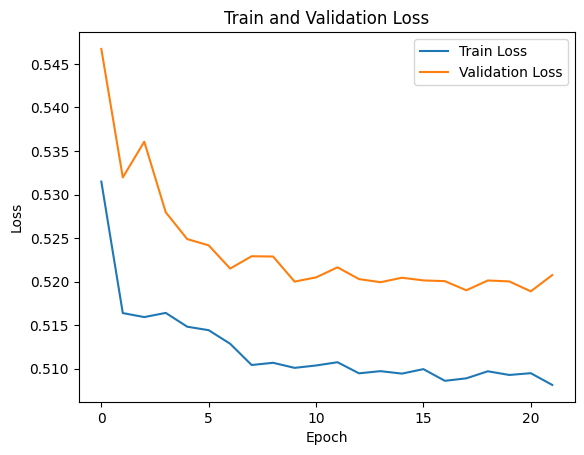

In [14]:
train_seg_model(gradient_maps_model, gradient_maps_train_loader, gradient_maps_val_loader, cuda_device, model_save_path=f"models/{dataset}/unet_grayscale", learning_rate=0.001)

In [10]:
centroids_model = Unet()
dataset = "PANNUKE0"
centroids_train_loader, centroids_val_loader, centroids_test_loader = get_seg_data_loaders(
    img_dir=f"data/{dataset}/images",
    mask_dir=f"CAM_outputs/{dataset}/centroid_maps",
    contiguous_ids_file=f"data/{dataset}/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

Training for epoch 0: 100%|██████████| 90/90 [00:40<00:00,  2.25it/s]


Epoch 1/1000
Train loss: 0.2252048427859942
Val loss: 0.10981148911847008


Training for epoch 1: 100%|██████████| 90/90 [00:36<00:00,  2.50it/s]


Epoch 2/1000
Train loss: 0.07097987313237455
Val loss: 0.0532754166258706


Training for epoch 2: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 3/1000
Train loss: 0.049061426892876625
Val loss: 0.04458915177318785


Training for epoch 3: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 4/1000
Train loss: 0.04412473398778174
Val loss: 0.042089815934499106
Progress on best val loss (0.04458915177318785) was inferior to 0.005, patience reduced to 4.


Training for epoch 4: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 5/1000
Train loss: 0.04250853115485774
Val loss: 0.04151332841979133
Progress on best val loss (0.042089815934499106) was inferior to 0.005, patience reduced to 3.


Training for epoch 5: 100%|██████████| 90/90 [00:35<00:00,  2.55it/s]


Epoch 6/1000
Train loss: 0.042105356603860854
Val loss: 0.0413012166817983
Progress on best val loss (0.04151332841979133) was inferior to 0.005, patience reduced to 2.


Training for epoch 6: 100%|██████████| 90/90 [00:35<00:00,  2.50it/s]


Epoch 7/1000
Train loss: 0.041914980775780146
Val loss: 0.04124308112594816
Progress on best val loss (0.0413012166817983) was inferior to 0.005, patience reduced to 1.


Training for epoch 7: 100%|██████████| 90/90 [00:36<00:00,  2.48it/s]


Epoch 8/1000
Train loss: 0.04187833476397726
Val loss: 0.041082930399311914
Progress on best val loss (0.04124308112594816) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 0.0001.


Training for epoch 8: 100%|██████████| 90/90 [00:35<00:00,  2.53it/s]


Epoch 9/1000
Train loss: 0.04180846094257302
Val loss: 0.041087915831142005
No progress on best val loss (0.041082930399311914) was made, patience reduced to 4.


Training for epoch 9: 100%|██████████| 90/90 [00:35<00:00,  2.54it/s]


Epoch 10/1000
Train loss: 0.041748333432608184
Val loss: 0.04112605907850796
No progress on best val loss (0.041082930399311914) was made, patience reduced to 3.


Training for epoch 10: 100%|██████████| 90/90 [00:36<00:00,  2.48it/s]


Epoch 11/1000
Train loss: 0.041715260884828034
Val loss: 0.04110986317197482
No progress on best val loss (0.041082930399311914) was made, patience reduced to 2.


Training for epoch 11: 100%|██████████| 90/90 [00:35<00:00,  2.55it/s]


Epoch 12/1000
Train loss: 0.04174105595383379
Val loss: 0.041095654831992255
No progress on best val loss (0.041082930399311914) was made, patience reduced to 1.


Training for epoch 12: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 13/1000
Train loss: 0.041734839437736405
Val loss: 0.041049652463859984
Progress on best val loss (0.041082930399311914) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1e-05.


Training for epoch 13: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 14/1000
Train loss: 0.04165269537932343
Val loss: 0.041064982447359295
No progress on best val loss (0.041049652463859984) was made, patience reduced to 4.


Training for epoch 14: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 15/1000
Train loss: 0.041679218370053506
Val loss: 0.04103262590037452
Progress on best val loss (0.041049652463859984) was inferior to 0.005, patience reduced to 3.


Training for epoch 15: 100%|██████████| 90/90 [00:35<00:00,  2.54it/s]


Epoch 16/1000
Train loss: 0.04163252868586116
Val loss: 0.040996638933817546
Progress on best val loss (0.04103262590037452) was inferior to 0.005, patience reduced to 2.


Training for epoch 16: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 17/1000
Train loss: 0.04166897452539868
Val loss: 0.04101557127303547
No progress on best val loss (0.040996638933817546) was made, patience reduced to 1.


Training for epoch 17: 100%|██████████| 90/90 [00:35<00:00,  2.53it/s]


Epoch 18/1000
Train loss: 0.041632673227124745
Val loss: 0.04096877757045958
Progress on best val loss (0.040996638933817546) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1.0000000000000002e-06.


Training for epoch 18: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 19/1000
Train loss: 0.04160654830435912
Val loss: 0.0409342139131493
Progress on best val loss (0.04096877757045958) was inferior to 0.005, patience reduced to 4.


Training for epoch 19: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 20/1000
Train loss: 0.04159129502044784
Val loss: 0.04098463687631819
No progress on best val loss (0.0409342139131493) was made, patience reduced to 3.


Training for epoch 20: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 21/1000
Train loss: 0.041613782321413356
Val loss: 0.04103350399268998
No progress on best val loss (0.0409342139131493) was made, patience reduced to 2.


Training for epoch 21: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 22/1000
Train loss: 0.04163026478555468
Val loss: 0.04101066208548016
No progress on best val loss (0.0409342139131493) was made, patience reduced to 1.


Training for epoch 22: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 23/1000
Train loss: 0.0416360550870498
Val loss: 0.04098559088177151
No progress on best val loss (0.0409342139131493) was made, patience reduced to 0.
Best val loss: 0.0409342139131493 at epoch 18
Stopping training.


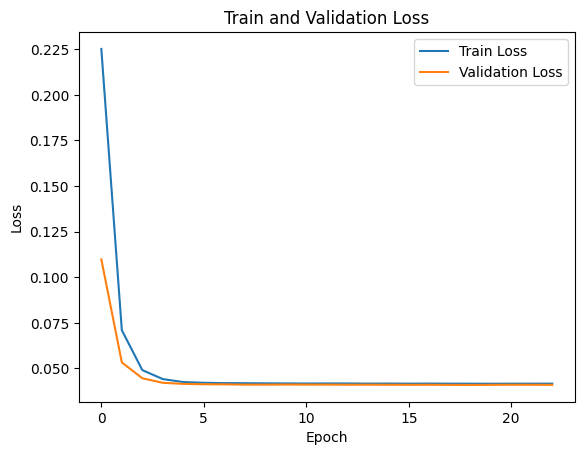

In [11]:
train_seg_model(centroids_model, centroids_train_loader, centroids_val_loader, cuda_device, model_save_path=f"models/{dataset}/unet_centroids", learning_rate=0.001)

In [11]:
gt_model = Unet()
dataset = "PANNUKE0"
gt_train_loader, gt_val_loader, gt_test_loader = get_seg_data_loaders(
    img_dir=f"data/{dataset}/images",
    mask_dir=f"data/{dataset}/masks",
    contiguous_ids_file=f"data/{dataset}/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

Training for epoch 0: 100%|██████████| 90/90 [00:42<00:00,  2.09it/s]


Epoch 1/1000
Train loss: 0.33747416681286374
Val loss: 0.27399720394722005


Training for epoch 1: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 2/1000
Train loss: 0.2686430893186656
Val loss: 0.2657315385753666


Training for epoch 2: 100%|██████████| 90/90 [00:35<00:00,  2.50it/s]


Epoch 3/1000
Train loss: 0.2640286766387768
Val loss: 0.26897953901867466
No progress on best val loss (0.2657315385753666) was made, patience reduced to 4.


Training for epoch 3: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 4/1000
Train loss: 0.26625089582591527
Val loss: 0.2657693049403633
No progress on best val loss (0.2657315385753666) was made, patience reduced to 3.


Training for epoch 4: 100%|██████████| 90/90 [00:35<00:00,  2.55it/s]


Epoch 5/1000
Train loss: 0.26493446973997203
Val loss: 0.25715469967546295


Training for epoch 5: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 6/1000
Train loss: 0.26438375440822026
Val loss: 0.2676285258240063
No progress on best val loss (0.25715469967546295) was made, patience reduced to 4.


Training for epoch 6: 100%|██████████| 90/90 [00:35<00:00,  2.53it/s]


Epoch 7/1000
Train loss: 0.2632430073464674
Val loss: 0.2702150046880383
No progress on best val loss (0.25715469967546295) was made, patience reduced to 3.


Training for epoch 7: 100%|██████████| 90/90 [00:35<00:00,  2.50it/s]


Epoch 8/1000
Train loss: 0.26235500165725606
Val loss: 0.2595962085173091
No progress on best val loss (0.25715469967546295) was made, patience reduced to 2.


Training for epoch 8: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 9/1000
Train loss: 0.26358653942671584
Val loss: 0.25811576249777013
No progress on best val loss (0.25715469967546295) was made, patience reduced to 1.


Training for epoch 9: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]


Epoch 10/1000
Train loss: 0.2620174197257675
Val loss: 0.25970150448039625
No progress on best val loss (0.25715469967546295) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 0.0001.


Training for epoch 10: 100%|██████████| 90/90 [00:36<00:00,  2.47it/s]


Epoch 11/1000
Train loss: 0.2601500296057427
Val loss: 0.2566109701441696
Progress on best val loss (0.25715469967546295) was inferior to 0.005, patience reduced to 4.


Training for epoch 11: 100%|██████████| 90/90 [00:36<00:00,  2.50it/s]


Epoch 12/1000
Train loss: 0.2562566883394027
Val loss: 0.25485748760297106
Progress on best val loss (0.2566109701441696) was inferior to 0.005, patience reduced to 3.


Training for epoch 12: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 13/1000
Train loss: 0.2581107491105961
Val loss: 0.2526576806414495
Progress on best val loss (0.25485748760297106) was inferior to 0.005, patience reduced to 2.


Training for epoch 13: 100%|██████████| 90/90 [00:35<00:00,  2.50it/s]


Epoch 14/1000
Train loss: 0.25519453079434823
Val loss: 0.2515442945925846
Progress on best val loss (0.2526576806414495) was inferior to 0.005, patience reduced to 1.


Training for epoch 14: 100%|██████████| 90/90 [00:36<00:00,  2.50it/s]


Epoch 15/1000
Train loss: 0.25510654154865875
Val loss: 0.2462290234347266


Training for epoch 15: 100%|██████████| 90/90 [00:35<00:00,  2.54it/s]


Epoch 16/1000
Train loss: 0.2544878452982898
Val loss: 0.24556230180957453
Progress on best val loss (0.2462290234347266) was inferior to 0.005, patience reduced to 4.


Training for epoch 16: 100%|██████████| 90/90 [00:36<00:00,  2.48it/s]


Epoch 17/1000
Train loss: 0.25405788765577564
Val loss: 0.25254821880162
No progress on best val loss (0.24556230180957453) was made, patience reduced to 3.


Training for epoch 17: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 18/1000
Train loss: 0.25310518400139587
Val loss: 0.24821409535492825
No progress on best val loss (0.24556230180957453) was made, patience reduced to 2.


Training for epoch 18: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 19/1000
Train loss: 0.2534023696383315
Val loss: 0.2456026753324775
No progress on best val loss (0.24556230180957453) was made, patience reduced to 1.


Training for epoch 19: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 20/1000
Train loss: 0.2528654346329884
Val loss: 0.2451459530428426
Progress on best val loss (0.24556230180957453) was inferior to 0.005, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1e-05.


Training for epoch 20: 100%|██████████| 90/90 [00:36<00:00,  2.48it/s]


Epoch 21/1000
Train loss: 0.24898630177468797
Val loss: 0.2471067375350938
No progress on best val loss (0.2451459530428426) was made, patience reduced to 4.


Training for epoch 21: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 22/1000
Train loss: 0.24886262660348185
Val loss: 0.24347826032503564
Progress on best val loss (0.2451459530428426) was inferior to 0.005, patience reduced to 3.


Training for epoch 22: 100%|██████████| 90/90 [00:36<00:00,  2.49it/s]


Epoch 23/1000
Train loss: 0.25034546095892884
Val loss: 0.24108962413761093
Progress on best val loss (0.24347826032503564) was inferior to 0.005, patience reduced to 2.


Training for epoch 23: 100%|██████████| 90/90 [00:36<00:00,  2.47it/s]


Epoch 24/1000
Train loss: 0.24882685568199675
Val loss: 0.23628028469792828
Progress on best val loss (0.24108962413761093) was inferior to 0.005, patience reduced to 1.


Training for epoch 24: 100%|██████████| 90/90 [00:36<00:00,  2.45it/s]


Epoch 25/1000
Train loss: 0.2501545419153309
Val loss: 0.24461431703513956
No progress on best val loss (0.23628028469792828) was made, patience reduced to 0.
Patience dropped to 0, changed learning rate to 1.0000000000000002e-06.


Training for epoch 25: 100%|██████████| 90/90 [00:35<00:00,  2.51it/s]


Epoch 26/1000
Train loss: 0.2467137123387281
Val loss: 0.24276727455011773
No progress on best val loss (0.23628028469792828) was made, patience reduced to 4.


Training for epoch 26: 100%|██████████| 90/90 [00:35<00:00,  2.52it/s]


Epoch 27/1000
Train loss: 0.24737273672960403
Val loss: 0.24062600272558382
No progress on best val loss (0.23628028469792828) was made, patience reduced to 3.


Training for epoch 27: 100%|██████████| 90/90 [00:36<00:00,  2.50it/s]


Epoch 28/1000
Train loss: 0.25020690806876345
Val loss: 0.24226916008481492
No progress on best val loss (0.23628028469792828) was made, patience reduced to 2.


Training for epoch 28: 100%|██████████| 90/90 [00:36<00:00,  2.48it/s]


Epoch 29/1000
Train loss: 0.24810547592810728
Val loss: 0.2418273044359378
No progress on best val loss (0.23628028469792828) was made, patience reduced to 1.


Training for epoch 29: 100%|██████████| 90/90 [00:35<00:00,  2.50it/s]


Epoch 30/1000
Train loss: 0.24810554651666053
Val loss: 0.2451648261951795
No progress on best val loss (0.23628028469792828) was made, patience reduced to 0.
Best val loss: 0.23628028469792828 at epoch 23
Stopping training.


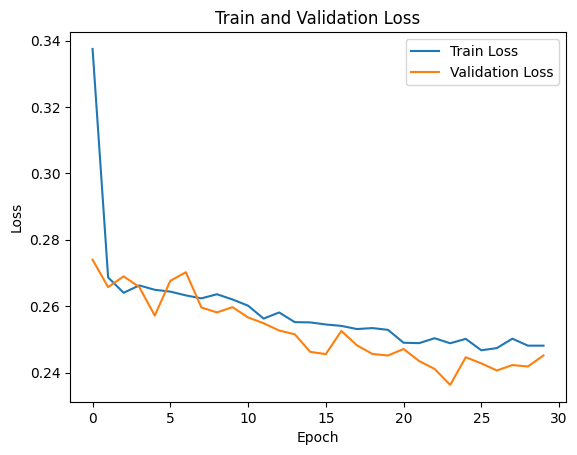

In [8]:
train_seg_model(gt_model, gt_train_loader, gt_val_loader, cuda_device, model_save_path=f"models/{dataset}/unet_gt", learning_rate=0.001)

In [39]:
gt_model = Unet()
dataset = "PANNUKE0"
_, _, universal_test_loader = get_seg_data_loaders(
    img_dir=f"data/{dataset}/images",
    mask_dir=f"data/{dataset}/masks",
    contiguous_ids_file=f"data/{dataset}/labels/contiguous_ids.npy",
    split_seed=split_seed,
    batch_size=16,
    val_split=0.2,
    test_split=0.1
)

In [40]:
trained_model_path = f"models/{dataset}/unet_gt_23"
gt_model = Unet()
gt_model.load_state_dict(torch.load(trained_model_path, map_location=torch.device(cuda_device), weights_only=False))
gt_model.eval()
gt_model.to(torch.device(cuda_device))

Unet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [41]:
trained_model_path = f"models/{dataset}/unet_centroids_40"
centroids_model = Unet()
centroids_model.load_state_dict(torch.load(trained_model_path, map_location=torch.device(cuda_device), weights_only=False))
centroids_model.eval()
centroids_model.to(torch.device(cuda_device))

Unet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [42]:
trained_model_path = f"models/{dataset}/unet_gradient_maps_51"
gradient_maps_model = Unet()
gradient_maps_model.load_state_dict(torch.load(trained_model_path, map_location=torch.device(cuda_device), weights_only=False))
gradient_maps_model.eval()
gradient_maps_model.to(torch.device(cuda_device))

Unet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), p

In [47]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def dice_coefficient(preds, targets, smooth=1e-6):
    preds = preds.view(-1)
    targets = targets.view(-1)

    intersection = (preds * targets).sum()
    dice = (2. * intersection + smooth) / (preds.sum() + targets.sum() + smooth)
    
    return dice.item()

def iou_coefficient(preds, targets, smooth=1e-6):
    preds = preds.view(-1)
    targets = targets.view(-1)

    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum() - intersection
    iou = (intersection + smooth) / (union + smooth)

    return iou.item()

def normalize_predictions(preds):
    min_val = preds.min()
    max_val = preds.max()

    # Avoid division by zero if all predictions are the same
    if max_val - min_val == 0:
        return preds

    normalized_preds = (preds - min_val) / (max_val - min_val)
    return normalized_preds

def evaluate_dice_iou_scores(model, loader, device, normalize=True):
    model.eval()  # Set model to evaluation mode
    dice_scores = []
    iou_scores = []
    best_dice, worst_dice = -1, 1  # Initialize to track best and worst
    best_data, worst_data = None, None  # To store inputs, labels, preds
    
    with torch.no_grad():
        for inputs, labels, _id in tqdm(loader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.squeeze(3).to(device).float()  # Ground truth masks
            
            # Forward pass to get predictions
            outputs = model(inputs).squeeze(1)  # Remove channel dimension if necessary
            preds = torch.sigmoid(outputs)
            
            if normalize:
                preds = normalize_predictions(preds)  # Normalize the predictions

            # Threshold predictions at 0.5
            preds = (preds > 0.5).float()

            # Compute Dice score for the current batch
            dice_score = dice_coefficient(preds, labels)
            dice_scores.append(dice_score)

            # Compute IoU score for the current batch
            iou_score = iou_coefficient(preds, labels)
            iou_scores.append(iou_score)



    # Return the average Dice and IoU score across all batches
    average_dice_score = np.mean(dice_scores)
    average_iou_score = np.mean(iou_scores)

    print(f"Average Dice score on the test set: {average_dice_score}")
    print(f"Average IoU score on the test set: {average_iou_score}")


    return average_dice_score, average_iou_score



average_dice, average_iou = evaluate_dice_iou_scores(centroids_model, universal_test_loader, cuda_device)


Evaluating: 100%|██████████| 13/13 [00:02<00:00,  4.87it/s]

Average Dice score on the test set: 0.00434948607849387
Average IoU score on the test set: 0.002180626123355558
